In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Getting the wORLD bANK dATA
world_data = pd.read_csv("World_data.csv")
world_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,134.772341
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,88.061110
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.591951
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.324186
4,Arab World,ARB,Aquaculture production (metric tons),ER.FSH.AQUA.MT,1960,4600.000000


The indicator selected for this assignment are:
* CO2 emissions (kt)
* CO2 emissions from solid fuel consumption (kt)
* CO2 emissions from liquid fuel consumption (kt)
* CO2 emissions from gaseous fuel consumption (kt)

In [3]:
#Creating Dataframes based on Selected Indicators
total_emission_df = world_data[world_data["IndicatorName"] == "CO2 emissions (kt)"]
solid_emission_df = world_data[world_data["IndicatorName"] == "CO2 emissions from solid fuel consumption (kt)"]
liquid_emission_df = world_data[world_data["IndicatorName"] == "CO2 emissions from liquid fuel consumption (kt)"]
gaseous_emission_df = world_data[world_data["IndicatorName"] == "CO2 emissions from gaseous fuel consumption (kt)"]

total_emission_df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.600530e+04
146,Caribbean small states,CSS,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.878201e+03
280,Central Europe and the Baltics,CEB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,4.665334e+05
411,Early-demographic dividend,EAR,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.914790e+05
601,East Asia & Pacific,EAS,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,1.215380e+06


In [4]:
# Finding the mean() of total_emissions
total_emission_df.mean()

Year       1989.197952
Value    727933.884920
dtype: float64

In [5]:
# Checking Population Variance of all four indicators
import statistics as stat
print(stat.pvariance(total_emission_df['Value']))
print(stat.pvariance(solid_emission_df['Value']))
print(stat.pvariance(liquid_emission_df['Value']))
print(stat.pvariance(gaseous_emission_df['Value']))

5510836458836.431
1311062522163.2917
649599253584.1671
186411278652.77145


In [6]:
#Printing mean and standard deviation for all four indicators
print('data1: mean=%.3f stdv=%.3f' % (stat.mean(total_emission_df['Value']), stat.stdev(total_emission_df['Value'])))
print('data2: mean=%.3f stdv=%.3f' % (stat.mean(solid_emission_df['Value']), stat.stdev(solid_emission_df['Value'])))
print('data3: mean=%.3f stdv=%.3f' % (stat.mean(liquid_emission_df['Value']), stat.stdev(liquid_emission_df['Value'])))
print('data4: mean=%.3f stdv=%.3f' % (stat.mean(gaseous_emission_df['Value']), stat.stdev(gaseous_emission_df['Value'])))

data1: mean=727933.885 stdv=2347607.462
data2: mean=315957.303 stdv=1145064.042
data3: mean=259748.724 stdv=806008.165
data4: mean=130073.360 stdv=431771.337


In [7]:
#Calculating pearson correlation for total emissions
from scipy.stats import pearsonr
corr, _ = pearsonr(total_emission_df['Year'] , total_emission_df['Value'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.088


In [8]:
# Picking two countries for further analysis
country_list = ["ARB", "EAS"]

In [9]:
# getting all stat variables for both the countries and the whole world data
for country in country_list:
    print("country:"+country)
    print(total_emission_df[total_emission_df["CountryCode"]==country].describe())
print("World:")
print(total_emission_df.describe()) 

country:ARB
              Year         Value
count    57.000000  5.700000e+01
mean   1988.000000  7.744798e+05
std      16.598193  5.591249e+05
min    1960.000000  5.600530e+04
25%    1974.000000  3.091536e+05
50%    1988.000000  6.548235e+05
75%    2002.000000  1.062297e+06
max    2016.000000  1.953774e+06
country:EAS
              Year         Value
count    57.000000  5.700000e+01
mean   1988.000000  5.618949e+06
std      16.598193  4.071228e+06
min    1960.000000  9.654668e+05
25%    1974.000000  2.512486e+06
50%    1988.000000  4.580927e+06
75%    2002.000000  7.120525e+06
max    2016.000000  1.416607e+07
World:
               Year         Value
count  12988.000000  1.298800e+04
mean    1989.197952  7.279339e+05
std       16.455367  2.347607e+06
min     1960.000000 -8.067400e+01
25%     1975.000000  1.030427e+03
50%     1990.000000  1.240179e+04
75%     2004.000000  1.548498e+05
max     2016.000000  2.160113e+07


In [10]:
# creation of individual dataframes for each country and merge them on year
corr_country_df1 = total_emission_df[total_emission_df["CountryCode"]=='ARB']
corr_country_df2 = total_emission_df[total_emission_df["CountryCode"]=='EAS']
df3 = corr_country_df1[["Value","Year"]].merge(corr_country_df2[["Value","Year"]],on=["Year"])
df3.head()

,Value_x,Year,Value_y
0,56005.299798,1960,1.215380e+06
1,62578.605590,1961,1.052154e+06
2,70562.050726,1962,9.654668e+05
3,85085.751513,1963,1.010724e+06
4,99693.913771,1964,1.066263e+06


In [11]:
#getting the correlation value to see the change across years
df3.corr()

,Value_x,Year,Value_y
Value_x,1.000000,0.972027,0.992528
Year,0.972027,1.000000,0.946258
Value_y,0.992528,0.946258,1.000000


###Value_x and Value_y represent the correlation between countries (EAR and ARB). There is 99% change across years

<AxesSubplot:xlabel='Year'>

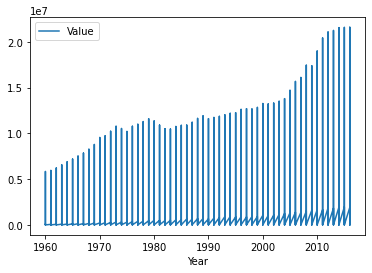

In [16]:
#plotting total_emission
total_emission_df.plot(x="Year", y="Value")

The emission from Solid


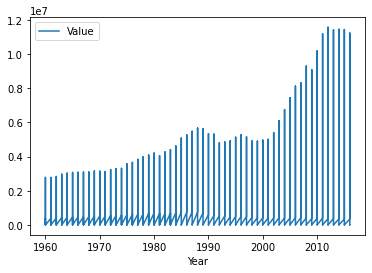

The emission from Liquid


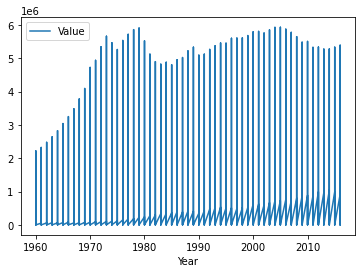

The emission from Gas


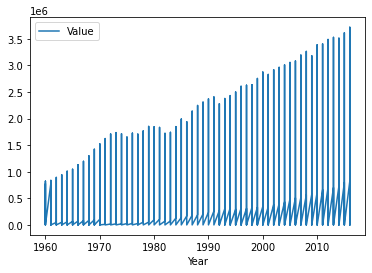

In [17]:
#individual plots for Solid, Liquid and Gas emissions
emission_dict = {"Solid":solid_emission_df, "Liquid":liquid_emission_df, "Gas":gaseous_emission_df}
for state in ["Solid", "Liquid", "Gas"]:
    data = emission_dict[state].copy()
    print("The emission from "+state)
    data.plot(x="Year", y="Value")
    plt.show()
    

In [18]:
# merging dataframes
data = solid_emission_df.append(liquid_emission_df).append(gaseous_emission_df)
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
290,Central Europe and the Baltics,CEB,CO2 emissions from solid fuel consumption (kt),EN.ATM.CO2E.SF.KT,1960,3.634896e+05
421,Early-demographic dividend,EAR,CO2 emissions from solid fuel consumption (kt),EN.ATM.CO2E.SF.KT,1960,2.557509e+05
611,East Asia & Pacific,EAS,CO2 emissions from solid fuel consumption (kt),EN.ATM.CO2E.SF.KT,1960,1.008221e+06
776,East Asia & Pacific (excluding high income),EAP,CO2 emissions from solid fuel consumption (kt),EN.ATM.CO2E.SF.KT,1960,7.824027e+05
950,East Asia & Pacific (IDA & IBRD countries),TEA,CO2 emissions from solid fuel consumption (kt),EN.ATM.CO2E.SF.KT,1960,7.602874e+05


<AxesSubplot:ylabel='Value'>

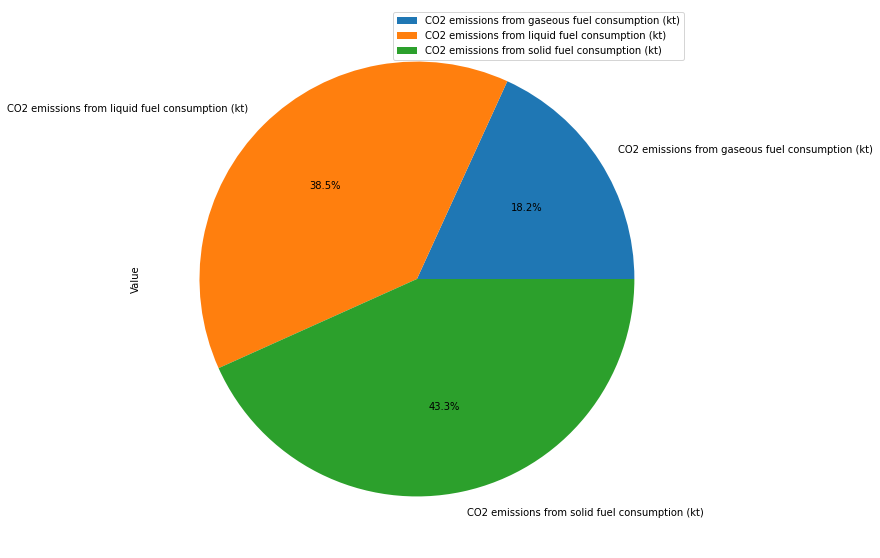

In [19]:
# pie chart for all indicators
data.groupby(['IndicatorName']).sum().plot(kind='pie', y='Value', figsize=(15, 10), autopct='%1.1f%%')